In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	640.5990

Best Fitness:	635.5618
Solution:	600.0000
Diff:		35.5618

[0:17:05][----------] 1.96% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.0801

Best Fitness:	623.4115
Solution:	600.0000
Diff:		23.4115

[0:32:24][----------] 3.92% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	638.7227

Best Fitness:	631.6545
Solution:	600.0000
Diff:		31.6545

[0:47:15][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	630.8978

Best Fitness:	624.4381
Solution:	600.0000
Diff:		24.4381

[1:01:32][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	633.3232

Best Fitness:	627.3272
Solution:	600.0000
Diff:		27.3272

[1:16:07][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.5160

Best Fitness:	625.8159
Solution:	600.0000
Diff:		25.8159

[1:30:42][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	633.0672

Best Fitness:	627.5145
Solution:	600.0000
Diff:		27.5145

[1:45:21][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	637.3718

Best Fitness:	632.4074
Solution:	600.0000
Diff:		32.4074

[2:00:05][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	629.4028

Best Fitness:	624.6598
Solution:	600.0000
Diff:		24.6598

[2:15:01][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	632.7150

Best Fitness:	626.0240
Solution:	600.0000
Diff:		26.0240

[2:29:35][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	638.7136

Best Fitness:	629.4657
Solution:	600.0000
Diff:		29.4657

[2:44:06][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	638.2925

Best Fitness:	632.6525
Solution:	600.0000
Diff:		32.6525

[2:57:32][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	632.0939

Best Fitness:	627.8317
Solution:	600.0000
Diff:		27.8317

[3:10:47][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.9695

Best Fitness:	626.0917
Solution:	600.0000
Diff:		26.0917

[3:23:53][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	638.2958

Best Fitness:	631.6127
Solution:	600.0000
Diff:		31.6127

[3:37:14][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.6895

Best Fitness:	626.2159
Solution:	600.0000
Diff:		26.2159

[3:50:30][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	638.7378

Best Fitness:	632.6559
Solution:	600.0000
Diff:		32.6559

[4:03:16][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	639.5774

Best Fitness:	632.3277
Solution:	600.0000
Diff:		32.3277

[4:16:22][####------] 35.29% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.2240

Best Fitness:	625.2148
Solution:	600.0000
Diff:		25.2148

[4:29:26][####------] 37.25% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	628.0470

Best Fitness:	622.2220
Solution:	600.0000
Diff:		22.2220

[4:42:36][####------] 39.22% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	639.0174

Best Fitness:	631.4470
Solution:	600.0000
Diff:		31.4470

[4:55:43][####------] 41.18% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	634.5306

Best Fitness:	628.7106
Solution:	600.0000
Diff:		28.7106

[5:08:41][####------] 43.14% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	628.4577

Best Fitness:	623.8759
Solution:	600.0000
Diff:		23.8759

[5:21:11][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	632.8789

Best Fitness:	627.7571
Solution:	600.0000
Diff:		27.7571

[5:34:08][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	640.0397

Best Fitness:	633.5046
Solution:	600.0000
Diff:		33.5046

[5:46:22][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	624.3169

Best Fitness:	618.9200
Solution:	600.0000
Diff:		18.9200

[5:58:00][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	636.3303

Best Fitness:	628.8160
Solution:	600.0000
Diff:		28.8160

[6:09:47][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	628.0924

Best Fitness:	623.3256
Solution:	600.0000
Diff:		23.3256

[6:21:22][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	626.6320

Best Fitness:	621.6174
Solution:	600.0000
Diff:		21.6174

[6:32:21][######----] 56.86% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	636.8977

Best Fitness:	628.7136
Solution:	600.0000
Diff:		28.7136

[6:44:07][######----] 58.82% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	626.6414

Best Fitness:	621.0989
Solution:	600.0000
Diff:		21.0989

[6:55:47][######----] 60.78% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	623.5938

Best Fitness:	619.0441
Solution:	600.0000
Diff:		19.0441

[7:07:19][######----] 62.75% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	635.8430

Best Fitness:	628.4285
Solution:	600.0000
Diff:		28.4285

[7:18:49][######----] 64.71% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	632.7164

Best Fitness:	626.9035
Solution:	600.0000
Diff:		26.9035

[7:30:14][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	634.5444

Best Fitness:	627.7673
Solution:	600.0000
Diff:		27.7673

[7:41:37][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	630.7670

Best Fitness:	623.8619
Solution:	600.0000
Diff:		23.8619

[7:53:37][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	636.6268

Best Fitness:	629.5263
Solution:	600.0000
Diff:		29.5263

[8:05:03][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.6627

Best Fitness:	624.2798
Solution:	600.0000
Diff:		24.2798

[8:16:37][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	637.4888

Best Fitness:	631.7714
Solution:	600.0000
Diff:		31.7714

[8:27:08][########--] 76.47% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	637.3788

Best Fitness:	631.6046
Solution:	600.0000
Diff:		31.6046

[8:37:29][########--] 78.43% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.0298

Best Fitness:	625.6715
Solution:	600.0000
Diff:		25.6715

[8:47:22][########--] 80.39% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	638.0078

Best Fitness:	632.4975
Solution:	600.0000
Diff:		32.4975

[8:57:29][########--] 82.35% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	635.0569

Best Fitness:	627.8920
Solution:	600.0000
Diff:		27.8920

[9:07:40][########--] 84.31% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	634.1758

Best Fitness:	625.9027
Solution:	600.0000
Diff:		25.9027

[9:17:46][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	633.2366

Best Fitness:	627.7255
Solution:	600.0000
Diff:		27.7255

[9:28:24][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	638.2738

Best Fitness:	632.6751
Solution:	600.0000
Diff:		32.6751

[9:38:33][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	637.3203

Best Fitness:	630.5344
Solution:	600.0000
Diff:		30.5344

[9:49:06][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	632.0574

Best Fitness:	626.4050
Solution:	600.0000
Diff:		26.4050

[9:59:27][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	632.6050

Best Fitness:	627.4013
Solution:	600.0000
Diff:		27.4013

[10:09:48][##########] 96.08% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	634.5916

Best Fitness:	629.6167
Solution:	600.0000
Diff:		29.6167

[10:19:30][##########] 98.04% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	631.8713

Best Fitness:	627.7198
Solution:	600.0000
Diff:		27.7198

[10:30:25][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

10:30:25

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
392,31.392728,29.76521,29.911388,32.620717,32.376070,30.342307,31.942762,32.402363,34.65744,31.836986,...,33.263435,33.47005,31.74922,32.387237,31.782176,30.29426,31.490139,32.791191,32.209522,50
393,31.392728,29.76521,29.911388,32.620717,32.376070,29.985762,31.942762,32.402363,34.65744,31.836986,...,33.263435,33.47005,31.74922,32.387237,31.782176,30.29426,31.490139,32.791191,32.209522,50
394,31.392728,29.76521,29.911388,32.620717,32.376070,29.985762,31.942762,32.402363,34.65744,31.836986,...,33.263435,33.47005,31.74922,32.387237,31.782176,30.29426,31.490139,32.791191,32.209522,50
395,31.392728,29.76521,29.911388,32.620717,30.500147,29.985762,31.942762,32.402363,34.65744,31.836986,...,33.263435,33.47005,31.74922,32.387237,31.782176,30.29426,31.490139,32.791191,32.209522,50
396,31.392728,29.76521,29.911388,32.620717,30.500147,29.985762,31.942762,32.402363,34.65744,31.836986,...,33.263435,33.47005,31.74922,32.387237,31.782176,30.29426,31.490139,32.791191,32.209522,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 35.561750974474535

Best error for run 1: 23.411461570989786

Best error for run 2: 31.65447712771322

Best error for run 3: 24.438107435771258

Best error for run 4: 27.327170474956347

Best error for run 5: 25.81594005368561

Best error for run 6: 27.514483893591205

Best error for run 7: 32.40740042757568

Best error for run 8: 24.659788979201153

Best error for run 9: 26.024022066206044

Best error for run 10: 29.465660764448216

Best error for run 11: 32.65247525285565

Best error for run 12: 27.83169777822536

Best error for run 13: 26.09174842345101

Best error for run 14: 31.612728456522177

Best error for run 15: 26.21593740698063

Best error for run 16: 32.65590501782776

Best error for run 17: 32.32772318558341

Best error for run 18: 25.214813206461145

Best error for run 19: 22.22202461788561

Best error for run 20: 31.447030908350143

Best error for run 21: 28.710604125216037

Best error for run 22: 23.875887079700306

Best error for run 23: 27.75708193703565

Best error for run 24: 33.504552644949854

Best error for run 25: 18.919962463284833

Best error for run 26: 28.815978250923877

Best error for run 27: 23.32558981442139

Best error for run 28: 21.617404474988348

Best error for run 29: 28.71362753404685

Best error for run 30: 21.098938034848516

Best error for run 31: 19.044145319340487

Best error for run 32: 28.428497021967587

Best error for run 33: 26.903507720505218

Best error for run 34: 27.767276923991403

Best error for run 35: 23.861910951698746

Best error for run 36: 29.52626127282997

Best error for run 37: 24.27980351822339

Best error for run 38: 31.771383441286616

Best error for run 39: 31.604636211656498

Best error for run 40: 25.671473233731035

Best error for run 41: 32.497524775458714

Best error for run 42: 27.892008319549632

Best error for run 43: 25.902708599418588

Best error for run 44: 27.72548783836828

Best error for run 45: 32.67512805081549

Best error for run 46: 30.534431935813473

Best error for run 47: 26.40499512923475

Best error for run 48: 27.401346879056746

Best error for run 49: 29.616736777594497

Best error for run 50: 27.719807807308598

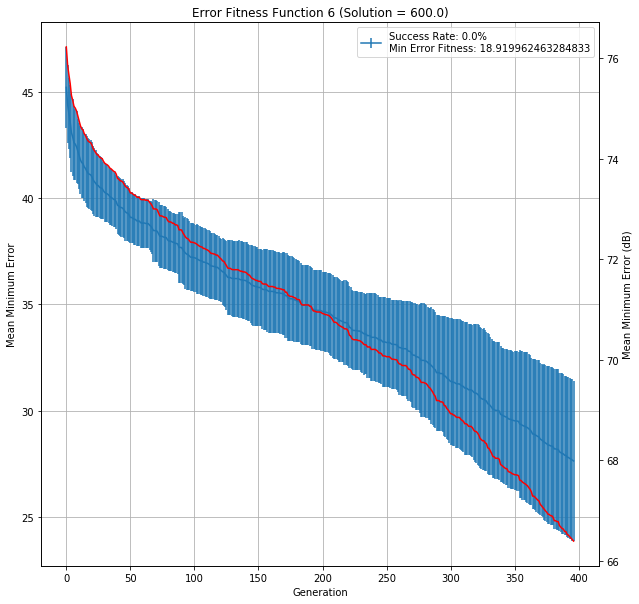

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.4,35.561751,23.411462,31.654477,24.438107,27.32717,25.81594,...,27.725488,32.675128,30.534432,26.404995,27.401347,29.616737,27.719808,27.649432,10:30:25,119700
